In [8]:
##imports
import re # regular expressions library
import os # for dealing with files
import pandas as pd # for data
import matplotlib.pyplot as plt #Charts!
import plotly.graph_objects as go #Graph objects!
import plotly.express as px
from pprint import pprint # Helps debug dictionaries by displaying them nicely

transcripts_folder = 'transcripts_new'
'---'

'---'

In [9]:
# given players string return players dictionary
def parse_players(players_string):
    
    # Remove the "{" and "}" from the ends of the string
    players_string = players_string.replace("{", "").replace("}", "")
    
    # Split the string into list of individual player entries,
    player_entries = players_string.split(", ")
    #pprint(player_entries)
    ## make a dictionary of players ##
    players={}
    for player in player_entries:
        # Split at colon to get key-value pairs
        key, value = player.split(": ")
        players[key.strip("\'")] = value.strip("\'") # Assign key value, quotes stripped
            
    return players

In [10]:

#test: make players dictionary from string
test_parser=parse_players("{'Ryan Hodges': 'mafia', 'Mary Trujillo': 'town', 'Christopher Smith': "
 "'town', 'Diana Pennington': 'town', 'Christina Rollins': 'town', 'Troy "
 "Thomas': 'town', 'Natalie Morris': 'mafia'}")
pprint(test_parser) # desplay dictionary
print(f"Troy Thomas is {test_parser['Troy Thomas']}.") # use dictionary to display player role

{'Christina Rollins': 'town',
 'Christopher Smith': 'town',
 'Diana Pennington': 'town',
 'Mary Trujillo': 'town',
 'Natalie Morris': 'mafia',
 'Ryan Hodges': 'mafia',
 'Troy Thomas': 'town'}
Troy Thomas is town.


In [11]:

#test: make players dictionary from string
test_parser=parse_players("{'Mr. Michael Nelson Jr.': 'mafia', 'Brittany Taylor': 'town', 'Nicole Lang': 'town', 'Julian Barrett': 'mafia', 'Christopher Turner': 'town', 'Nathan Lynch': 'town', 'Veronica Snyder': 'town'}")
pprint(test_parser) # desplay dictionary
print(f"Mr. Michael Nelson Jr. is {test_parser['Mr. Michael Nelson Jr.']}.") # use dictionary to display player role

{'Brittany Taylor': 'town',
 'Christopher Turner': 'town',
 'Julian Barrett': 'mafia',
 'Mr. Michael Nelson Jr.': 'mafia',
 'Nathan Lynch': 'town',
 'Nicole Lang': 'town',
 'Veronica Snyder': 'town'}
Mr. Michael Nelson Jr. is mafia.


In [12]:
# given names and ranked list returns avg percentile of given names
def average_percentile_rank(mafia_list, players):
    #print(f"searching for {mafia_list} in {players}")
    # Find the rank of each mafia (their index in the players list)
    mafia_ranks = [float(players.index(mafioso)) for mafioso in mafia_list]
    # Calculate the percentile of each rank
    total_players = float(len(players))
    mafia_percentiles = [(rank / total_players) * 100 for rank in mafia_ranks]
    
    # Calculate the average of the mafia_percentiles
    average_mafia_percentile = sum(mafia_percentiles) / len(mafia_percentiles)
    
    # Return the average percentile rank of the mafia members
    return average_mafia_percentile

In [13]:
lll=list(['Christina Rollins','Christopher Smith','Diana Pennington','Mary Trujillo','Natalie Morris','Ryan Hodges','Troy Thomas'])
mmm=list(['Christina Rollins','Christopher Smith'])
nnn=list(['Ryan Hodges','Troy Thomas'])
print(average_percentile_rank(mmm,lll))
print(average_percentile_rank(nnn,lll))
print(average_percentile_rank(mmm,lll[0:-2]))

7.142857142857142
78.57142857142857
10.0


In [14]:
block='''
 1. Brittany Taylor
 2. Nathan Lynch
 3. Nicole Lang
 4. Julian Barrett
 5. Christopher Turner
 6. Veronica Snyder
 Actualy likely to be Mafia: Nathan Lynch
'''
players= ['Brittany Taylor','Nicole Lang','Julian Barrett','Christopher Turner','Nathan Lynch','Veronica Snyder']

# Extract the rank information from the block
ranks = sorted(players, key=lambda player: block.index(player))

print(ranks)

['Brittany Taylor', 'Nathan Lynch', 'Nicole Lang', 'Julian Barrett', 'Christopher Turner', 'Veronica Snyder']


In [4]:
# Sample inputs
block = "alice bob charlie dave"
players = ["charlie", "dave", "alice", "bob"]

# Create a ranking list based on the order of players in the block string
ranks = sorted(players, key=lambda player: block.index(player))

# Print the result
print(ranks)


['alice', 'bob', 'charlie', 'dave']


In [15]:
# given file location, return dictionary with file info
def read_ranks_file(file_path):
    ranks_location = os.path.join(file_path, 'ranks.txt')
    # Check if the 'ranks.txt' file exists in the specified location
    if os.path.isfile(ranks_location):
        with open(ranks_location, "r") as f:
            # Read the contents of the file into a string
            contents = f.read()
    else:
        print(f"Error: 'ranks.txt' file not found in {file_path}")
        return None
    
    # Split the string into individual blocks using tripple new lines as delimiters
    blocks = re.split("\n\n\n", contents)
    #pprint(blocks[0])
    
    # Initialize an empty dictionary to store the dictionaries for each block
    sessions = {}
    
    dud_data=[] #list of bad sessions
    # Iterate over each block and extract the relevant information
    for block in blocks[:-1]:
        # Split the block into individual lines using new line characters as delimiters
        lines = block.split("\n")
        #print("Block: ",end='')
        #pprint(block)
        try:
            # Extract the file name from the first line
            file_name = re.search("File:\s*(\S+)", lines[0]).group(1).strip(".txt")
            #print(f"parsing file:{file_name}...",end="")
            #pprint(f"contents: \n{lines}")
            
            # Extract the session number from the second line
            session = int(re.search(r'\d+', lines[1]).group(0))
            #session = re.search("Session:\s*(\S+)", lines[1]).group(1)
            #print(session,end=', ')
            
            # Create a dictionary to store the information for this block
            dictionary = {"file_name": file_name, "session": session}

            # record true if aliases where used for names at prompt time
            dictionary["names_changed"] = "anonymized" in file_name
            
            # Extract the list of players from the last line
            players_line = lines[-1].strip()
            players = parse_players(players_line) #re.search("\[(.*?)\]", players_line).group(1)
            #dictionary["Players"] = players #{player: role for player, role in zip(players, ["town" if i % 2 == 0 else "mafia" for i in range(len(players))])}
            
            #mafia list
            mafia_list = [name for name, role in players.items() if role == 'mafia']
            dictionary["mafia"] = mafia_list
            
            # Extract the rank information from the block
            ranks = sorted(players, key=lambda player: block.index(player))

            # save ranks to dictionary.
            dictionary["ranks"] = ranks
            #print("Ranks: ",end='')
            #print(ranks)
            
            dictionary['avg_mafia_rank']= average_percentile_rank(mafia_list,ranks)
            
            # Add this dictionary to the dictionary of sessions
            sessions[file_name]=dictionary
            #print(f"parsed:{file_name}",end=". ")
            session = False
        except Exception as e:
            print(f"Could not parse this block: {str(e)}")
            pprint(block)
            if session:
                dud_data.append(session)# add to list of bad sessions
            
    # remove bad session from data
    sessions = {key: val for key, val in sessions.items() if val["session"] not in dud_data}
    for dud in dud_data:
        print(f"Excluding session {dud}. Both blocks could not be parsed.")
    
    '''
    for key, value in sessions.items():
        if isinstance(value, dict):  # Check if the value is a dictionary
            if value["session"] in dud_data:  # Check if the nested dictionary's value is equal to 'dud'
                dud = value["session"]
                del sessions[key]  # Remove the entry from sessions
                print(f"Removed session {dud}. It's duplicate was excluded.")
    '''
    
    return {k: v for k, v in sorted(sessions.items(), key=lambda item: item[1]['session'])} # return session sorted by session num
"---"

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\publicuser\AppData\Local\Temp\ipykernel_17668\3021273140.py:29: SyntaxWarning: invalid escape sequence '\s'
  file_name = re.search("File:\s*(\S+)", lines[0]).group(1).strip(".txt")


'---'

## Results 

In [23]:
parsed_content = read_ranks_file(transcripts_folder)
#pprint(parsed_content)

### pandas dataframe

In [24]:
ranks_df = pd.DataFrame.from_dict(parsed_content, orient='index')
ranks_df

,file_name,session,names_changed,mafia,ranks,avg_mafia_rank
session_1,session_1,1,False,"[Ryan Hodges, Natalie Morris]","[Mary Trujillo, Troy Thomas, Natalie Morris, R...",35.714286
session_1_anonymized,session_1_anonymized,1,True,"[Player_M, Player_W]","[Player_P, Player_F, Player_D, Player_J, Playe...",71.428571
session_2,session_2,2,False,"[Shawn Bailey, Tricia Miller]","[Diane Mooney, Alicia Randall, Jordan May, Sha...",50.000000
session_2_anonymized,session_2_anonymized,2,True,"[Player_T, Player_E]","[Player_J, Player_T, Player_I, Player_O, Playe...",25.000000
session_3,session_3,3,False,"[Jeremy Davis, Harold Peterson]","[Roy Moore, Scott Glenn, Kimberly Ibarra, Jere...",38.888889
...,...,...,...,...,...,...
session_42_anonymized,session_42_anonymized,42,True,"[Player_D, Player_T]","[Player_B, Player_L, Player_E, Player_A, Playe...",75.000000
session_43,session_43,43,False,"[Zachary Hurley, Laura Pena]","[Valerie White, Danielle Silva, Carol Stone, D...",75.000000
session_43_anonymized,session_43_anonymized,43,True,"[Player_H, Player_K]","[Player_B, Player_K, Player_E, Player_U, Playe...",43.750000
session_44,session_44,44,False,"[Richard Stevens, Jessica Michael]","[Deborah Alvarez, Nicole Barker, Angela Murphy...",68.750000


In [25]:
ranks_df.set_index(['session','file_name']).sort_values(by='session')

names_changed  \
session file_name                              
1       session_1                      False   
        session_1_anonymized            True   
2       session_2                      False   
        session_2_anonymized            True   
3       session_3                      False   
...                                      ...   
42      session_42_anonymized           True   
43      session_43                     False   
        session_43_anonymized           True   
44      session_44                     False   
        session_44_anonymized           True   

                                                            mafia  \
session file_name                                                   
1       session_1                   [Ryan Hodges, Natalie Morris]   
        session_1_anonymized                 [Player_M, Player_W]   
2       session_2                   [Shawn Bailey, Tricia Miller]   
        session_2_anonymized                 [Player_T, Player_E]   
3       session_3                 [Jeremy Davis, Harold Peterson]   
...                                                           ...   
42      session_42_anonymized                [Player_D, Player_T]   
43      session_43                   [Zachary Hurley, Laura Pena]   
        session_43_anonymized                [Player_H, Player_K]   
44      session_44             [Richard Stevens, Jessica Michael]   
        session_44_anonymized                [Player_I, Player_Y]   

                                                                           ranks  \
session file_name                                                                  
1       session_1              [Mary Trujillo, Troy Thomas, Natalie Morris, R...   
        session_1_anonymized   [Player_P, Player_F, Player_D, Player_J, Playe...   
2       session_2              [Diane Mooney, Alicia Randall, Jordan May, Sha...   
        session_2_anonymized   [Player_J, Player_T, Player_I, Player_O, Playe...   
3       session_3              [Roy Moore, Scott Glenn, Kimberly Ibarra, Jere...   
...                                                                          ...   
42      session_42_anonymized  [Player_B, Player_L, Player_E, Player_A, Playe...   
43      session_43             [Valerie White, Danielle Silva, Carol Stone, D...   
        session_43_anonymized  [Player_B, Player_K, Player_E, Player_U, Playe...   
44      session_44             [Deborah Alvarez, Nicole Barker, Angela Murphy...   
        session_44_anonymized  [Player_B, Player_C, Player_Z, Player_A, Playe...   

                               avg_mafia_rank  
session file_name                              
1       session_1                   35.714286  
        session_1_anonymized        71.428571  
2       session_2                   50.000000  
        session_2_anonymized        25.000000  
3       session_3                   38.888889  
...                                       ...  
42      session_42_anonymized       75.000000  
43      session_43                  75.000000  
        session_43_anonymized       43.750000  
44      session_44                  68.750000  
        session_44_anonymized       75.000000  

[88 rows x 4 columns]

#### Data Analysis
Here is what matters.

In [26]:
# Times the rankings where accurate sorted by most accurate
accurate_rankings = ranks_df[ranks_df['avg_mafia_rank'] < 40].sort_values(by='avg_mafia_rank')


In [27]:
# Count the number of rows where 'avg_mafia_rank' is less than 40
count_less_than_40 = len(ranks_df[ranks_df['avg_mafia_rank'] < 40])

# Calculate the total number of rows in the DataFrame
total_rows = len(ranks_df)

# Calculate the percentage
percentage = (count_less_than_40 / total_rows) * 100

print(f"Percentage of times 'avg_mafia_rank' was higher than 40: {percentage:.2f}%")
print(f"Not rounded: {percentage}%")

Percentage of times 'avg_mafia_rank' was higher than 40: 48.86%
Not rounded: 48.86363636363637%


In [28]:
# First, check where avg_mafia_rank is different for each session
session_group = ranks_df.groupby('session')['avg_mafia_rank'].nunique()
# Filter out sessions where there is more than one unique avg_mafia_rank
sessions_with_diff_rank = session_group[session_group > 1].index
# Now filter the original dataframe based on these sessions
filtered_df = ranks_df[ranks_df['session'].isin(sessions_with_diff_rank)]
# Display the result
print("Times aliases effected the avg_mafia_rank")
filtered_df

Times aliases effected the avg_mafia_rank


,file_name,session,names_changed,mafia,ranks,avg_mafia_rank
session_1,session_1,1,False,"[Ryan Hodges, Natalie Morris]","[Mary Trujillo, Troy Thomas, Natalie Morris, R...",35.714286
session_1_anonymized,session_1_anonymized,1,True,"[Player_M, Player_W]","[Player_P, Player_F, Player_D, Player_J, Playe...",71.428571
session_2,session_2,2,False,"[Shawn Bailey, Tricia Miller]","[Diane Mooney, Alicia Randall, Jordan May, Sha...",50.000000
session_2_anonymized,session_2_anonymized,2,True,"[Player_T, Player_E]","[Player_J, Player_T, Player_I, Player_O, Playe...",25.000000
session_3,session_3,3,False,"[Jeremy Davis, Harold Peterson]","[Roy Moore, Scott Glenn, Kimberly Ibarra, Jere...",38.888889
...,...,...,...,...,...,...
session_42_anonymized,session_42_anonymized,42,True,"[Player_D, Player_T]","[Player_B, Player_L, Player_E, Player_A, Playe...",75.000000
session_43,session_43,43,False,"[Zachary Hurley, Laura Pena]","[Valerie White, Danielle Silva, Carol Stone, D...",75.000000
session_43_anonymized,session_43_anonymized,43,True,"[Player_H, Player_K]","[Player_B, Player_K, Player_E, Player_U, Playe...",43.750000
session_44,session_44,44,False,"[Richard Stevens, Jessica Michael]","[Deborah Alvarez, Nicole Barker, Angela Murphy...",68.750000


In [196]:
ranks_df['avg_mafia_rank'].mean()

48.327334809892946

In [29]:
ranks_df['avg_mafia_rank'].mean()


42.49233405483405

### Graphs

In [30]:
#ranks_df.groupby('names_changed')['avg_mafia_rank'].mean().plot.pie()
fig_hist_avg_rank = px.histogram(ranks_df, x="file_name", y="avg_mafia_rank") 
fig_hist_avg_rank.show()

In [ ]:
ranks_df.plot(title=)

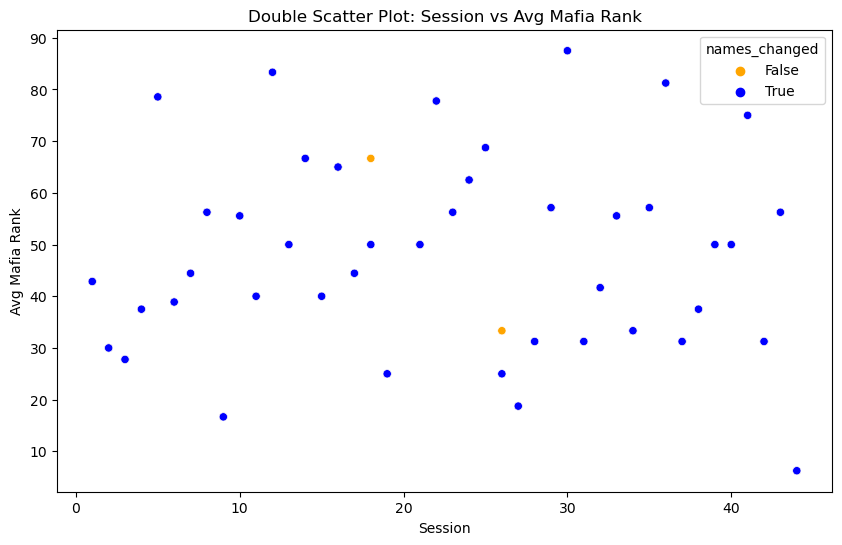

In [161]:
import seaborn as sns

# Assuming ranks_df is your DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Use seaborn scatterplot to differentiate by names_changed
sns.scatterplot(data=ranks_df, x='session', y='avg_mafia_rank', hue='names_changed', palette={True: 'blue', False: 'orange'})

# Add labels and title
plt.title("Double Scatter Plot: Session vs Avg Mafia Rank")
plt.xlabel("Session")
plt.ylabel("Avg Mafia Rank")

# Show the plot
plt.show()


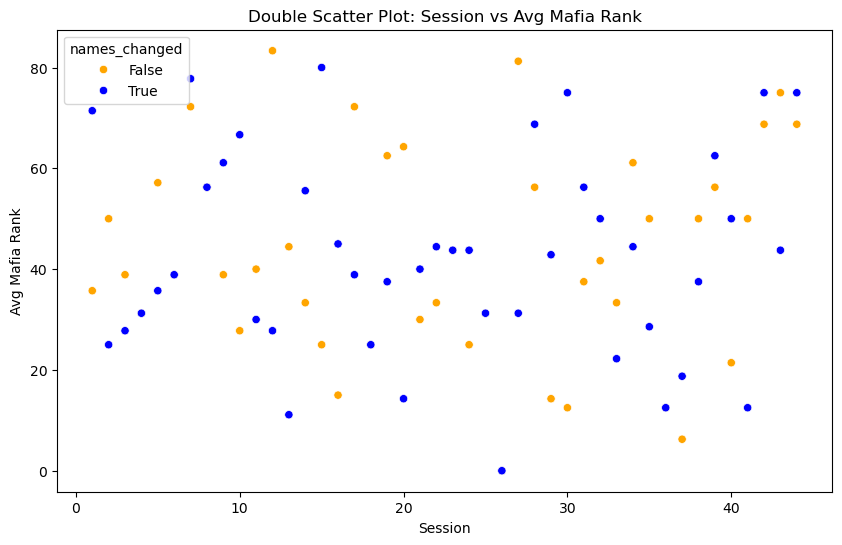

In [31]:
import seaborn as sns

# Assuming ranks_df is your DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Use seaborn scatterplot to differentiate by names_changed
sns.scatterplot(data=ranks_df, x='session', y='avg_mafia_rank', hue='names_changed', palette={True: 'blue', False: 'orange'})

# Add labels and title
plt.title("Double Scatter Plot: Session vs Avg Mafia Rank")
plt.xlabel("Session")
plt.ylabel("Avg Mafia Rank")

# Show the plot
plt.show()


In [296]:
ranks_df.names_changed.unique()

array([False,  True])

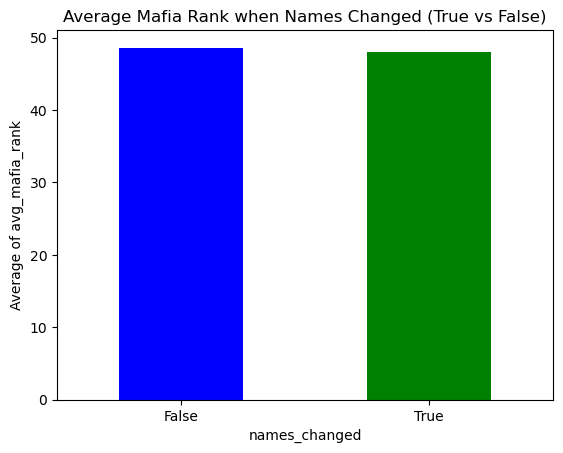

names_changed
False    48.618032
True     48.036637
Name: avg_mafia_rank, dtype: float64

In [108]:
# Group by 'names_changed' and calculate the average of 'avg_mafia_rank' for each group
avg_mafia_rank_by_names_changed = ranks_df.groupby('names_changed')['avg_mafia_rank'].mean()

# Plotting the bar chart
avg_mafia_rank_by_names_changed.plot(kind='bar', color=['blue', 'green'], title='Average Mafia Rank when Names Changed (True vs False)')
plt.ylabel('Average of avg_mafia_rank')
plt.xticks(rotation=0)
plt.show()
avg_mafia_rank_by_names_changed

In [192]:
sessions_with_diff_rank

Index([18, 26], dtype='int64', name='session')

In [186]:
ranks_df[ranks_df['avg_mafia_rank'] < 40].sort_values('names_changed')

,file_name,session,names_changed,mafia,ranks,avg_mafia_rank
session_2,session_2,2,False,"[Shawn Bailey, Tricia Miller]","[Stephen Clark, Gabriel Durham, Shawn Bailey, ...",30.000000
session_42,session_42,42,False,"[Jason Smith, Robert Anderson]","[Jason Smith, Kimberly Warren, Ricardo Owens, ...",31.250000
session_38,session_38,38,False,[Garrett Baker],"[Clayton Cook, James Smith, Ryan Ray, Garrett ...",37.500000
session_37,session_37,37,False,"[Elizabeth Saunders, Mariah Burke]","[Michelle Graham, Elizabeth Saunders, Kaitlyn ...",31.250000
session_34,session_34,34,False,"[Eric Fisher, James Lamb]","[Eric Fisher, George Le, Maxwell Reyes, Lori S...",33.333333
session_31,session_31,31,False,"[Jon Gutierrez, Ryan Russell]","[Jon Gutierrez, Brent Green, Kellie Anderson, ...",31.250000
session_28,session_28,28,False,"[Mike Burton, William Holmes]","[Mike Burton, Scott Thomas, Charles Graham, Ro...",31.250000
session_44,session_44,44,False,"[Richard Stevens, Jessica Michael]","[Richard Stevens, Jessica Michael, Deborah Alv...",6.250000
session_26,session_26,26,False,[Jennifer Diaz],"[Sarah Williams, Jennifer Diaz, Theresa Torres]",33.333333
session_19,session_19,19,False,[John Thompson],"[Frank Butler, Tanya Kennedy, John Thompson, M...",25.000000


In [170]:
df_true = ranks_df[ranks_df['names_changed'] == True]
len(df_true[df_true['avg_mafia_rank'] < 40])

15

In [183]:
df_false = ranks_df[ranks_df['names_changed'] == False]
df_false[df_false['avg_mafia_rank'] < 40].sort_values('avg_mafia_rank',ascending=False)

,file_name,session,names_changed,mafia,ranks,avg_mafia_rank
session_6,session_6,6,False,"[Ricky Mcneil, Jesse Martin]","[Jeremiah Johnson, Ricky Mcneil, Christopher D...",38.888889
session_4,session_4,4,False,"[Nicolas Cole, Wendy White]","[Nicolas Cole, Chelsea Cook, Danielle Castro, ...",37.500000
session_38,session_38,38,False,[Garrett Baker],"[Clayton Cook, James Smith, Ryan Ray, Garrett ...",37.500000
session_26,session_26,26,False,[Jennifer Diaz],"[Sarah Williams, Jennifer Diaz, Theresa Torres]",33.333333
session_34,session_34,34,False,"[Eric Fisher, James Lamb]","[Eric Fisher, George Le, Maxwell Reyes, Lori S...",33.333333
session_28,session_28,28,False,"[Mike Burton, William Holmes]","[Mike Burton, Scott Thomas, Charles Graham, Ro...",31.250000
session_31,session_31,31,False,"[Jon Gutierrez, Ryan Russell]","[Jon Gutierrez, Brent Green, Kellie Anderson, ...",31.250000
session_37,session_37,37,False,"[Elizabeth Saunders, Mariah Burke]","[Michelle Graham, Elizabeth Saunders, Kaitlyn ...",31.250000
session_42,session_42,42,False,"[Jason Smith, Robert Anderson]","[Jason Smith, Kimberly Warren, Ricardo Owens, ...",31.250000
session_2,session_2,2,False,"[Shawn Bailey, Tricia Miller]","[Stephen Clark, Gabriel Durham, Shawn Bailey, ...",30.000000


In [116]:
# Calculate sus for 'names_changed' == True
df_true = ranks_df[ranks_df['names_changed'] == True]
count_true = len(df_true[df_true['avg_mafia_rank'] < 40])
percentage_true = (count_true / len(df_true)) * 100 if len(df_true) > 0 else 0
print(f"Percentage of times anonymized ranking was accurate: {percentage_true}")

# Calculate sus for 'names_changed' == False
df_false = ranks_df[ranks_df['names_changed'] == False]
count_false = len(df_false[df_false['avg_mafia_rank'] < 40])
percentage_false = (count_false / len(df_false)) * 100 if len(df_false) > 0 else 0
print(f"Percentage of times non-anonymized ranking was accurate: {percentage_false}")


Percentage of times anonymized ranking was accurate: 34.883720930232556
Percentage of times non-anonymized ranking was accurate: 34.883720930232556


In [115]:

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(
        x=['Names Changed', 'Names Not Changed'], 
        y=[percentage_true, percentage_false], 
        text=[f'{percentage_true:.2f}%', f'{percentage_false:.2f}%'],
        textposition='auto',
        name='SUS'
    )
])

# Add labels and title
fig.update_layout(
    title="Percentage of Times Avg Mafia Rank Was In Top 40% (SUS)",
    xaxis_title="Names Changed",
    yaxis_title="SUS (%)",
    template="plotly_dark"
)

# Show the plot
fig.show()

In [200]:
fig1 = px.scatter()

# Add the points for 'names_changed' = False (blue)
fig1.add_scatter(x=df_false['session'], y=df_false['avg_mafia_rank'], 
                mode='markers', name='Names Changed = False', marker=dict(color='blue', opacity=0.5))

# Add the points for 'names_changed' = True (green)
fig1.add_scatter(x=df_true['session'], y=df_true['avg_mafia_rank'], 
                mode='markers', name='Names Changed = True', marker=dict(color='green', opacity=0.5))

# Set titles and labels
fig1.update_layout(
    title="Avg Percentile Rank of Mafia per Session",
    xaxis_title="Session",
    yaxis_title="Avg Mafia Percentile Rank (%)",
    legend_title="Names Changed"
    
)

# Show the plot
fig1.show()

In [202]:
fig1 = px.scatter()

# Add the points for 'names_changed' = False (blue)
fig1.add_scatter(x=df_false['session'], y=df_false['avg_mafia_rank'], 
                mode='markers', name='Names Changed = False', marker=dict(color='blue', opacity=0.5))

# Add the points for 'names_changed' = True (green)
fig1.add_scatter(x=df_true['session'], y=df_true['avg_mafia_rank'], 
                mode='markers', name='Names Changed = True', marker=dict(color='green', opacity=0.5))

# Set titles and labels
fig1.update_layout(
    title="Avg Percentile Rank of Mafia per Session",
    xaxis_title="Session",
    yaxis_title="Avg Mafia Percentile Rank (%)",
    legend_title="Names Changed"
    
)

# Add a dotted horizontal line at y = 50%
fig1.add_shape(
    type="line",
    x0=min(df_false['session'].min(), df_true['session'].min()),  # start of line on x-axis
    x1=max(df_false['session'].max(), df_true['session'].max()),  # end of line on x-axis
    y0=50,  # y position for the horizontal line
    y1=50,  # same y position for the horizontal line
    line=dict(
        color="gray",  # line color
        width=2,  # line width
        dash="dot"  # dotted line style
    ),
)

# Show the plot
fig1.show()

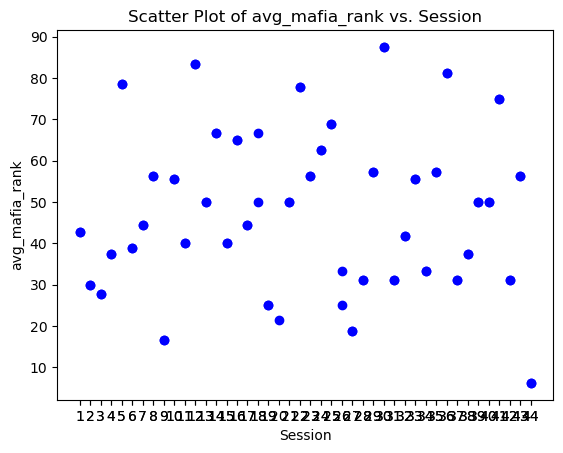

In [299]:
# Sort by the 'session' column
df_sorted = ranks_df.sort_values('session')

# Plotting the scatter plot
plt.scatter(df_sorted['session'], df_sorted['avg_mafia_rank'], color='blue', label='avg_mafia_rank')
plt.title('Scatter Plot of avg_mafia_rank vs. Session')
plt.xlabel('Session')
plt.ylabel('avg_mafia_rank')
plt.xticks(df_sorted['session'])  # Ensure x-ticks correspond to session values
plt.show()

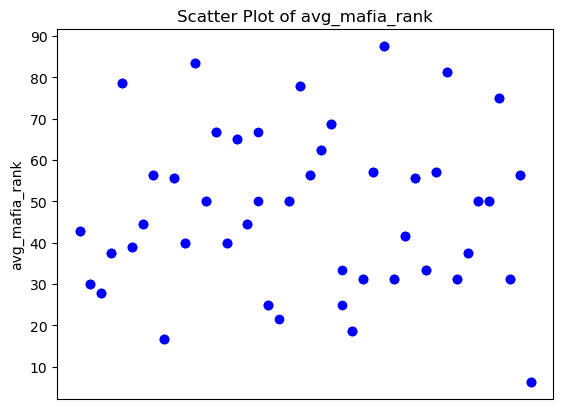

In [303]:
# Sort the data by 'avg_mafia_rank' (True/False) from least to greatest
df_sorted = ranks_df.sort_values(by='avg_mafia_rank')

# Plotting the scatter plot with an unlabeled x-axis
plt.scatter(df_sorted['session'], df_sorted['avg_mafia_rank'], color='blue')
plt.title('Scatter Plot of avg_mafia_rank')
plt.ylabel('avg mafia rank')
s
# Remove x-axis labels and ticks
plt.xticks([])  # Remove x-axis ticks and labels

plt.show()

In [118]:
ranks_DataFrame

,session_1,session_10,session_10_anonymized,session_11,session_11_anonymized,session_12,session_12_anonymized,session_13,session_13_anonymized,session_14,...,session_5,session_5_anonymized,session_6,session_6_anonymized,session_7,session_7_anonymized,session_8,session_8_anonymized,session_9,session_9_anonymized
file_name,session_1,session_10,session_10_anonymized,session_11,session_11_anonymized,session_12,session_12_anonymized,session_13,session_13_anonymized,session_14,...,session_5,session_5_anonymized,session_6,session_6_anonymized,session_7,session_7_anonymized,session_8,session_8_anonymized,session_9,session_9_anonymized
session,1,10,session_10,11,11,12,12,13,13,14,...,5,session_5,6,6,7,session_7,8,8,9,9
Players,"{'Ryan Hodges': 'town', 'Mary Trujillo': 'mafi...","{'Kyle Mack': 'town', 'Ashley Adams': 'mafia',...","{'Player_E': 'town', 'Player_R': 'mafia', 'Pla...","{'Bridget Russell': 'town', 'John Willis': 'ma...","{'Player_F': 'town', 'Player_P': 'mafia', 'Pla...","{'Laura Baldwin': 'town', 'Alexander Ford': 'm...","{'Player_U': 'town', 'Player_F': 'mafia', 'Pla...","{'Megan Jackson': 'town', 'Sara Marshall': 'ma...","{'Player_U': 'town', 'Player_R': 'mafia', 'Pla...","{'Michael Sharp': 'town', 'Austin Williams': '...",...,"{'Robert Evans': 'town', 'Sandra Robinson': 'm...","{'Player_U': 'town', 'Player_V': 'mafia', 'Pla...","{'Jeremiah Johnson': 'town', 'Ricky Mcneil': '...","{'Player_I': 'town', 'Player_Y': 'mafia', 'Pla...","{'John Thompson': 'town', 'Alyssa Reynolds': '...","{'Player_O': 'town', 'Player_D': 'mafia', 'Pla...","{'Justin Scott': 'town', 'Melissa Vang': 'mafi...","{'Player_Y': 'town', 'Player_V': 'mafia', 'Pla...","{'Kelsey Wallace': 'town', 'Mr. Robert Bryant'...","{'Player_L': 'town', 'Player_E': 'mafia', 'Pla..."
Ranks,"{'Ryan Hodges': 1, 'Mary Trujillo': 2, 'Christ...","{'Kyle Mack': 1, 'Ashley Adams': 2, 'Mary Arno...","{'Player_E': 1, 'Player_R': 2, 'Player_N': 3, ...","{'Bridget Russell': 1, 'John Willis': 2, 'Will...","{'Player_F': 1, 'Player_P': 2, 'Player_K': 3, ...","{'Laura Baldwin': 1, 'Alexander Ford': 2, 'Jac...","{'Player_U': 1, 'Player_F': 2, 'Player_Q': 3, ...","{'Megan Jackson': 1, 'Sara Marshall': 2, 'Dani...","{'Player_U': 1, 'Player_R': 2, 'Player_N': 3, ...","{'Michael Sharp': 1, 'Austin Williams': 2, 'Ja...",...,"{'Robert Evans': 1, 'Sandra Robinson': 2, 'Ter...","{'Player_U': 1, 'Player_V': 2, 'Player_H': 3, ...","{'Jeremiah Johnson': 1, 'Ricky Mcneil': 2, 'Ch...","{'Player_I': 1, 'Player_Y': 2, 'Player_J': 3, ...","{'John Thompson': 1, 'Alyssa Reynolds': 2, 'Ja...","{'Player_O': 1, 'Player_D': 2, 'Player_B': 3, ...","{'Justin Scott': 1, 'Melissa Vang': 2, 'Aaron ...","{'Player_Y': 1, 'Player_V': 2, 'Player_E': 3, ...","{'Kelsey Wallace': 1, 'Mr. Robert Bryant': 2, ...","{'Player_L': 1, 'Player_E': 2, 'Player_S': 3, ..."


## testing

In [96]:
### Scrap This!!! ###
import csv

def dict_to_csv(transcripts_folder, file_dict):
    filename = file_dict['file_name']
    grades_location = os.path.join(transcripts_folder, "graded_ranks", f"{filename}_rank.csv")
    #print(f"'{grades_location}'",end='. ')
    '''
    # write to a new csv
    with open(grades_location, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=file_dict.keys())
        writer.writeheader()
        writer.writerows([file_dict[key] for key in file_dict])
    '''

# Example dict_to_csv usage:
for file_dictionary in parsed_content:
    #print(parsed_content[file]['file_name'],end=", ")
    #print(parsed_content[file]['Players'][random.choice(list(parsed_content[file]['Players'].items()))[0]],end=", ")
    dict_to_csv(transcripts_folder, parsed_content[file_dictionary] )

In [179]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    pprint(ranks_df)

                                   file_name  session  names_changed  \
session_1                          session_1        1          False   
session_1_anonymized    session_1_anonymized        1           True   
session_2                          session_2        2          False   
session_2_anonymized    session_2_anonymized        2           True   
session_3                          session_3        3          False   
session_3_anonymized    session_3_anonymized        3           True   
session_4                          session_4        4          False   
session_4_anonymized    session_4_anonymized        4           True   
session_5                          session_5        5          False   
session_5_anonymized    session_5_anonymized        5           True   
session_6                          session_6        6          False   
session_6_anonymized    session_6_anonymized        6           True   
session_7                          session_7        7          F

In [284]:
pprint(parsed_content)

{'session_1': {'avg_mafia_rank': 42.857142857142854,
               'file_name': 'session_1',
               'mafia': ['Ryan Hodges', 'Natalie Morris'],
               'names_changed': False,
               'ranks': ['Ryan Hodges',
                         'Mary Trujillo',
                         'Christopher Smith',
                         'Diana Pennington',
                         'Christina Rollins',
                         'Troy Thomas',
                         'Natalie Morris'],
               'session': 1},
 'session_10': {'avg_mafia_rank': 55.55555555555556,
                'file_name': 'session_10',
                'mafia': ['Natasha Cooke', 'Michael Williams'],
                'names_changed': False,
                'ranks': ['Kyle Mack',
                          'Ashley Adams',
                          'Mary Arnold',
                          'Natasha Cooke',
                          'Adam Ward',
                          'Alicia Diaz',
                          'Sta